***
***

<center><h1>Prevendo Futuras Compras - Machine Learning</h1></center>

***
***

<center><img src = 'https://wiy.com.br/wp-content/uploads/2019/08/loja-virtual.png'></center>

***

***

# Descrição:

> Neste projeto, analisarei os dados disponibilizados pela empresa <b>Alura</b>. O objetivo é, com base nos dados de informações sobre clientes que usaram a plataforma e fizeram compras em seu site ou não, desenvolver um modelo usando aprendizado de máquina capaz de prever se um usuário em particular comprará ou não produtos em sua loja virtual. Para fins de aváliação do modelo, utilizei métricas como accuracy, precision, recall e o f1-score. Para visualização temos a matriz de confusão muito utilizada para aváliações de modelos de classificação.

# Atributos

<h4><b>Principal:</b></h4>

> O atributo <b>principal</b>, se trata de uma marcação com valores <b>0</b> ou <b>1</b>, valores igual a <b>1</b> significa que o usuário entrou na pagina principal do site, valores igual a <b>0</b> simboliza que o usuário não frequêntou a pagina principal.

<h4><b>Como Funciona:</b></h4>

> A variável <b>Como funciona</b> também se comporta da mesma maneira que o atributo <b>Principal</b>, ou seja, registros iguais a <b>1</b>, significa que o usuário entrou na página e registros iguais a <b>0</b> indicam que o usuário não compareceu à página <b>Como Funciona</b>.

<h4><b>Contato:</b></h4>

> O atributo <b>contato</b>, também com valores de <b>0</b> ou <b>1</b> representa se um determinado usuário entrou ou não em contato com a plataforma <b>Alura</b>, <b>0</b> significa não e <b>1</b> sim.

<h4><b>Comprou:</b></h4>

> E finalmente temos a coluna comprou, que também possue valores 0 ou 1, e tem o significa se determinado usuário comprou ou não produtos na plataforma. 1 para sim e 0 não <b>Alura</b>.

# Esborço: <br>

A. **Instalação e Importação das Bibliotecas Básicas**<br>
I. [Instalações](#Instalações)<br>
II. [Importações](#Importações)<br>
III. [Verificações](#Verificações)<br>

B. **Importando Base de Dados**<br>
I. [Carregando a base de dados](#carregando)<br>
II. [Estrutura da base de dados](#estrutura)<br>
III. [Informações gerais sobre os dados](#informações)<br>

C. **Análises de Correlações**<br>
I. [Matriz de Correlação](#matriz_correlação)<br>
II. [Distribuição entre compradores e não compradores](#dist)<br>
III. [Análise do comportamento de clientes](#comportamento)<br>
IV. [Análise apronfudada do comportamento de clientes](#aprofundada)<br>

D. **Processo de Modelagem com I.A - LinearSVC**<br>
I. [Instânciando e treinando o estimador](#linearsvc)<br>
II. [Avaliando o LinearSVC](#avaliandosvc)<br>

# A. Importação das Bibliotecas Básicas <br>

> Nesta primeira etapa, instalarei, importarei e verificarei todas as principais bibliotecas básicas que serão usadas ao longo do projeto, lembrando que essas são as bibliotecas básicas nas quais a maioria dos projetos que envolvem análise de dados e construção de modelos preditivos usa. Os links para a documentação de cada biblioteca estão abaixo.

> * matplotlib-: https://matplotlib.org/
> * Pytorch-: https://pytorch.org/
> * seaborn-: https://seaborn.pydata.org/
> * Pandas-: https://pandas.pydata.org/docs/#
> * numpy-: https://numpy.org/

## Ai. Instalações:

<a id="Instalações"></a>

In [1]:
!pip install torch --quiet
!pip install numpy --quiet
!pip install pandas --quiet
!pip install seaborn --quiet
!pip install matplotlib --quiet

## Aii. Importações:

<a id="Importações"></a>

In [2]:
# Ignoring Errors
import warnings
warnings.simplefilter("ignore")

import matplotlib
import torch

In [3]:
from torchsummary import summary
import matplotlib.pyplot as plt
from torch import nn, optim
import seaborn as sns
import pandas as pd
import numpy as np

## Aiii. Verificando as Versões Instaladas:

<a id ="Verificações"></a>

In [4]:
print('---------= Versions =---------')
print(f'  Matplotlib version-: {matplotlib.__version__}')
print(f'  Seaborn version-: {sns.__version__}')
print(f'  Pytorch version-: {torch.__version__}')
print(f'  Pandas version-: {pd.__version__}')
print(f'  Numpy version-: {np.__version__}')
print('-' * 29)

---------= Versions =---------
  Matplotlib version-: 3.1.3
  Seaborn version-: 0.10.0
  Pytorch version-: 1.4.0
  Pandas version-: 0.25.3
  Numpy version-: 1.18.1
-----------------------------


# B. Importando a Base de Dados <br>

## Bi. Carregando a Base de Dados:

<a id="carregando"></a>

In [5]:
# Realizando a importação dos dados com Pandas
uri = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
dados = pd.read_csv(uri)

# Renomeando as colunas para pt-br
dados.columns = ['Principal', 'Como_funciona', 'Contato', 'Comprou']

In [6]:
dados.head()

,Principal,Como_funciona,Contato,Comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


## Bii. Estrutura dos Dados:

<a id ="estrutura"></a>

In [7]:
dados.shape

(99, 4)

In [8]:
print('--= Estrutura dos Dados =--')
print(f'    {dados.shape[0]} - Linhas')
print(f'    {dados.shape[1]} - Colunas')
print('-----------------------------')

--= Estrutura dos Dados =--
    99 - Linhas
    4 - Colunas
-----------------------------


## Biii. Informações Gerais:

<a id = "informações"></a>

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
Principal        99 non-null int64
Como_funciona    99 non-null int64
Contato          99 non-null int64
Comprou          99 non-null int64
dtypes: int64(4)
memory usage: 3.2 KB


# C. Análises de Correlações <br>

## Ci. Matriz de Correlação

<a id="matriz_correlação"></a>

> No trabalho com análise de dados, muitas vezes precisamos construir uma matriz de correlação para descrever se há alguma associação entre as variáveis do seu conjunto de análise. Uma matriz de correlação é uma tabela mostrando coeficientes de correlação entre variáveis. Esse coeficiente varia entre 0 e 1.

> No nosso caso vamos análisar o nível de correlação das variáveis explicativas em relação a variável dependente. Como se trata de verificar se um usuário irá ou não comprar algum produto, utilizamos 0 para pessoas que não compraram e 1 para pessoas que compraram, desta forma, se o coeficiente de correlação apresenta um valor positivo os dados estão indicando que pessoas que frequentam determinada pagina tende a comprar produtos na plataforma <b>alura</b>. De forma contrária, correlações negativas indica que de acordo com os dados em análise pessoas que entram em certas páginas da plataforma tende a não efetuarem compras.

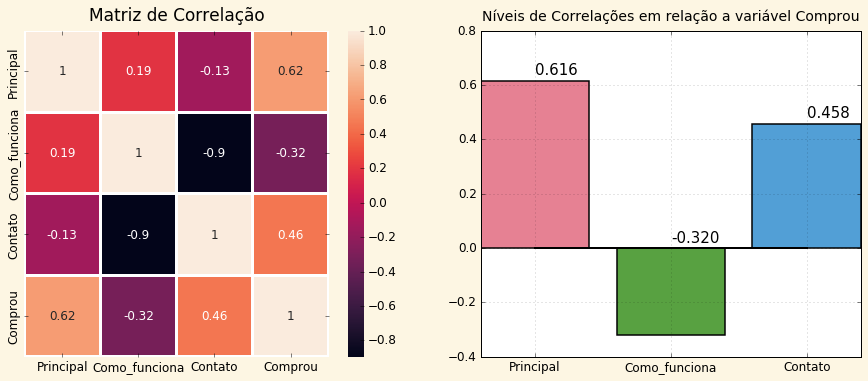

In [10]:
plt.style.use('Solarize_Light2')
plt.figure(figsize = (15, 6))
plt.style.use('classic')

# Gráfico I - Matriz de Correlação
plt.subplot(121)
sns.heatmap(dados.corr(), annot = True, lw = 2)
plt.title('Matriz de Correlação', fontsize = 17, pad = 10)

plt.subplot(122)
sns.barplot(dados.corr()['Comprou'].drop(index = 'Comprou').index, dados.corr()['Comprou'].drop(index = 'Comprou').values, edgecolor = 'k', lw = 1.5,
           palette=sns.color_palette("husl", 3))
plt.grid(True, color = 'k', alpha =.4)
plt.title('Níveis de Correlações em relação a variável Comprou', fontsize = 14, pad = 10)
plt.plot([0, 2], [0, 0], color = 'k', lw = 2)

plt.annotate(f"{dados.corr()['Comprou'].drop(index = 'Comprou').iloc[0]:.3f}", xy=(0, 0.64), fontsize = 15)
plt.annotate(f"{dados.corr()['Comprou'].drop(index = 'Comprou').iloc[1]:.3f}", xy=(1, 0.02), fontsize = 15)
plt.annotate(f"{dados.corr()['Comprou'].drop(index = 'Comprou').iloc[2]:.3f}", xy=(2, 0.48), fontsize = 15);

> Em ordem decrescente temos as seguintes variáveis:

I - <b>Principal</b>

> A variável Principal apresenta uma correlação de <b>0.616</b>, que é relativamente alta e importante para um modelo de aprendizado de máquina.

II - <b>Contato</b>

> Um pouco abaixo temos o atributo <b>Contato</b> que apresenta uma correlão positiva de <b>0.458</b>.

III - <b>Como_funciona</b>

> Com um coeficiente de correlação negativo de <b>-0.320</b> temos a variável "Como_funciona", e como já sabemos, coeficientes de correlação que apresenta um valor negativo, indica que em relação aos dados estudados pessoas que frequentam a página <b>Como_funciona</b> tendem não realizar compras na plataforma.

## Cii Distribuição entre compradores e não compradores 

<a id = "dist"></a>

> Vamos ver como o número de clientes que compraram e não compraram na plataforma é distribuído. Assim, podemos ter uma noção de quantos clientes entraram e fizeram compras e, mais importante, o número de clientes que entraram e não fizeram compras. Dessa forma, podemos tomar medidas para reduzir o número de clientes que entram na plataforma <b>Alura</b> e não fazem compras.

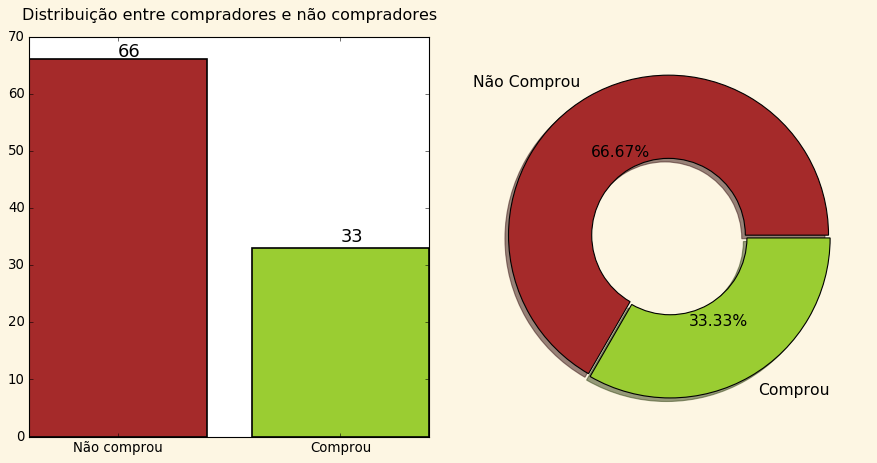

In [11]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (5, 5))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.1, 0, 1, 1])

eixo1.bar(['Não comprou', 'Comprou'], dados['Comprou'].value_counts().values, color = ['brown', 'yellowgreen'], lw = 1.5, edgecolor = 'k')
eixo1.annotate(f"{dados['Comprou'].value_counts()[0]}", xy = (0, 66.5), fontsize = 16)
eixo1.annotate(f"{dados['Comprou'].value_counts()[1]}", xy = (1, 34), fontsize = 16)
eixo1.set_title('Distribuição entre compradores e não compradores', pad = 15)

eixo2.pie(dados['Comprou'].value_counts(), colors = ['brown', 'yellowgreen'], labels = ['Não Comprou', 'Comprou'],
         autopct='%.2f%%', textprops={'size' : 14}, wedgeprops=dict(width=.52), shadow = True, explode=(.01, .01));

> No gráfico acima podemos ver que, de todos os clientes que entram na plataforma apenas <b>33.33%</b> efetuam compras. O nosso objetivo além de desenvolver um modelo utilizando aprendizado de máquina capaz de prever se determinado usuário irá ou não fazer compras na plataforma, temos que descobrir quais são os comportamentos dos consumidores na plataforma que levam o usuário a não realizar compras na <b>Alura</b>. Desta forma podemos tomar medidas para aumentar a taxa de pessoas que entram na plataforma <b>Alura</b> e realizam compras. O percentual atual de não compradores está de <b>66.67%</b>.

## Ciii. Análise do comportamento de clientes

<a id = "comportamento"></a>

> Para endendermos o que leva o cliente a não realizar compras na plataforma, devemos saber qual é o comportamento dos usuário dentro da plataforma que os leva a não fazerem compras. 

### Como Funciona

In [12]:
dist_como_funciona = pd.crosstab(index = dados['Como_funciona'], columns = dados['Comprou'])
dist_como_funciona.columns = ['Não Comprou', 'Comprou']
dist_como_funciona.rename(index = {0 : 'Não entrou', 1 : 'Entrou'}, inplace = True)
dist_como_funciona.style.background_gradient(cmap='Reds',subset=["Não Comprou"])\
                        .background_gradient(cmap='Blues',subset=["Comprou"])

,Não Comprou,Comprou
Como_funciona,,
Não entrou,32,27
Entrou,34,6


In [13]:
cores = ['brown', 'aqua']

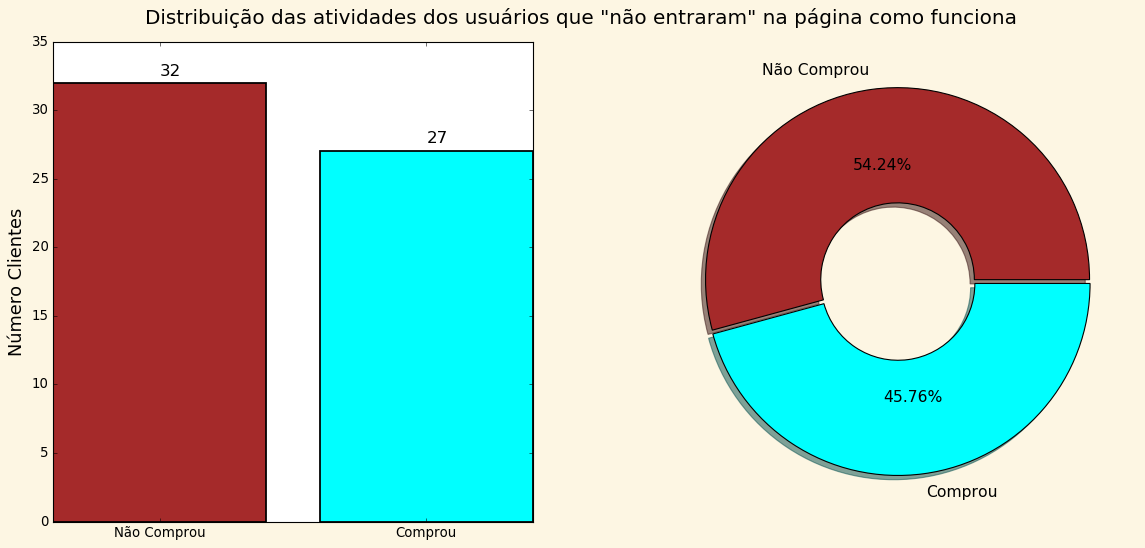

In [14]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (6, 6))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.26, 0, 1, 1])

eixo1.bar(dist_como_funciona.loc['Não entrou'].index, dist_como_funciona.loc['Não entrou'].values, color = cores, lw = 1.6, edgecolor = 'k')
eixo1.tick_params(labelsize=12, color = 'k')

# Legends
eixo1.annotate(f"{dist_como_funciona.loc['Não entrou'].values[0]}", xy = (0, 32.5), fontsize = 15)
eixo1.annotate(f"{dist_como_funciona.loc['Não entrou'].values[1]}", xy = (1, 27.6), fontsize = 15)
eixo1.set_ylabel('Número Clientes', fontsize = 16, color = 'k')

eixo2.pie(dist_como_funciona.loc['Não entrou'], colors = cores, explode=(0.01, 0.01), labels=dist_como_funciona.loc['Não entrou'].index,
         textprops={'size' : 14}, wedgeprops=dict(width=.6), autopct='%.2f%%', shadow = True)
plt.suptitle('Distribuição das atividades dos usuários que "não entraram" na página como funciona', fontsize = 18, y=1.07, x = 1.1)
fig.savefig('nao_entrou.png', bbox_inches='tight')

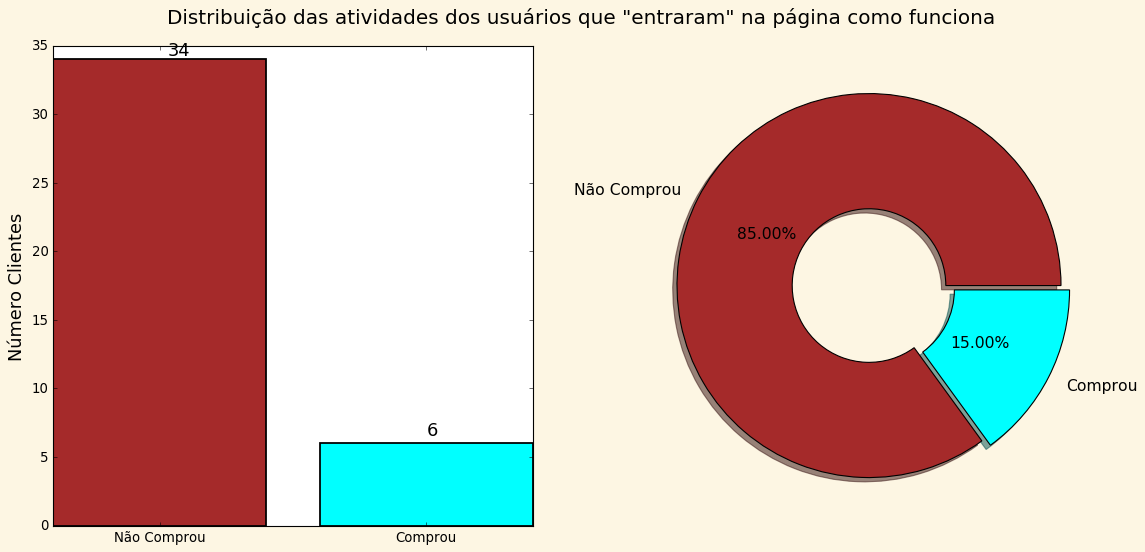

In [15]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (6, 6))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.2, 0, 1, 1])

eixo1.bar(dist_como_funciona.loc['Entrou'].index, dist_como_funciona.loc['Entrou'].values, color = cores, lw = 1.6, edgecolor = 'k')
eixo1.tick_params(labelsize=12, color = 'k')

# Legends
eixo1.annotate(f"{dist_como_funciona.loc['Entrou'].values[0]}", xy = (0.03, 34.3), fontsize = 16)
eixo1.annotate(f"{dist_como_funciona.loc['Entrou'].values[1]}", xy = (1, 6.6), fontsize = 16)
eixo1.set_ylabel('Número Clientes', fontsize = 16, color = 'k')

eixo2.pie(dist_como_funciona.loc['Entrou'], colors = cores, explode=(0, 0.05), labels=dist_como_funciona.loc['Entrou'].index,
         textprops={'size' : 14}, wedgeprops=dict(width=.6), autopct='%.2f%%', shadow = True)
plt.suptitle('Distribuição das atividades dos usuários que "entraram" na página como funciona', fontsize = 18, y=1.08, x = 1.1)
fig.savefig('entrou.png', bbox_inches='tight')

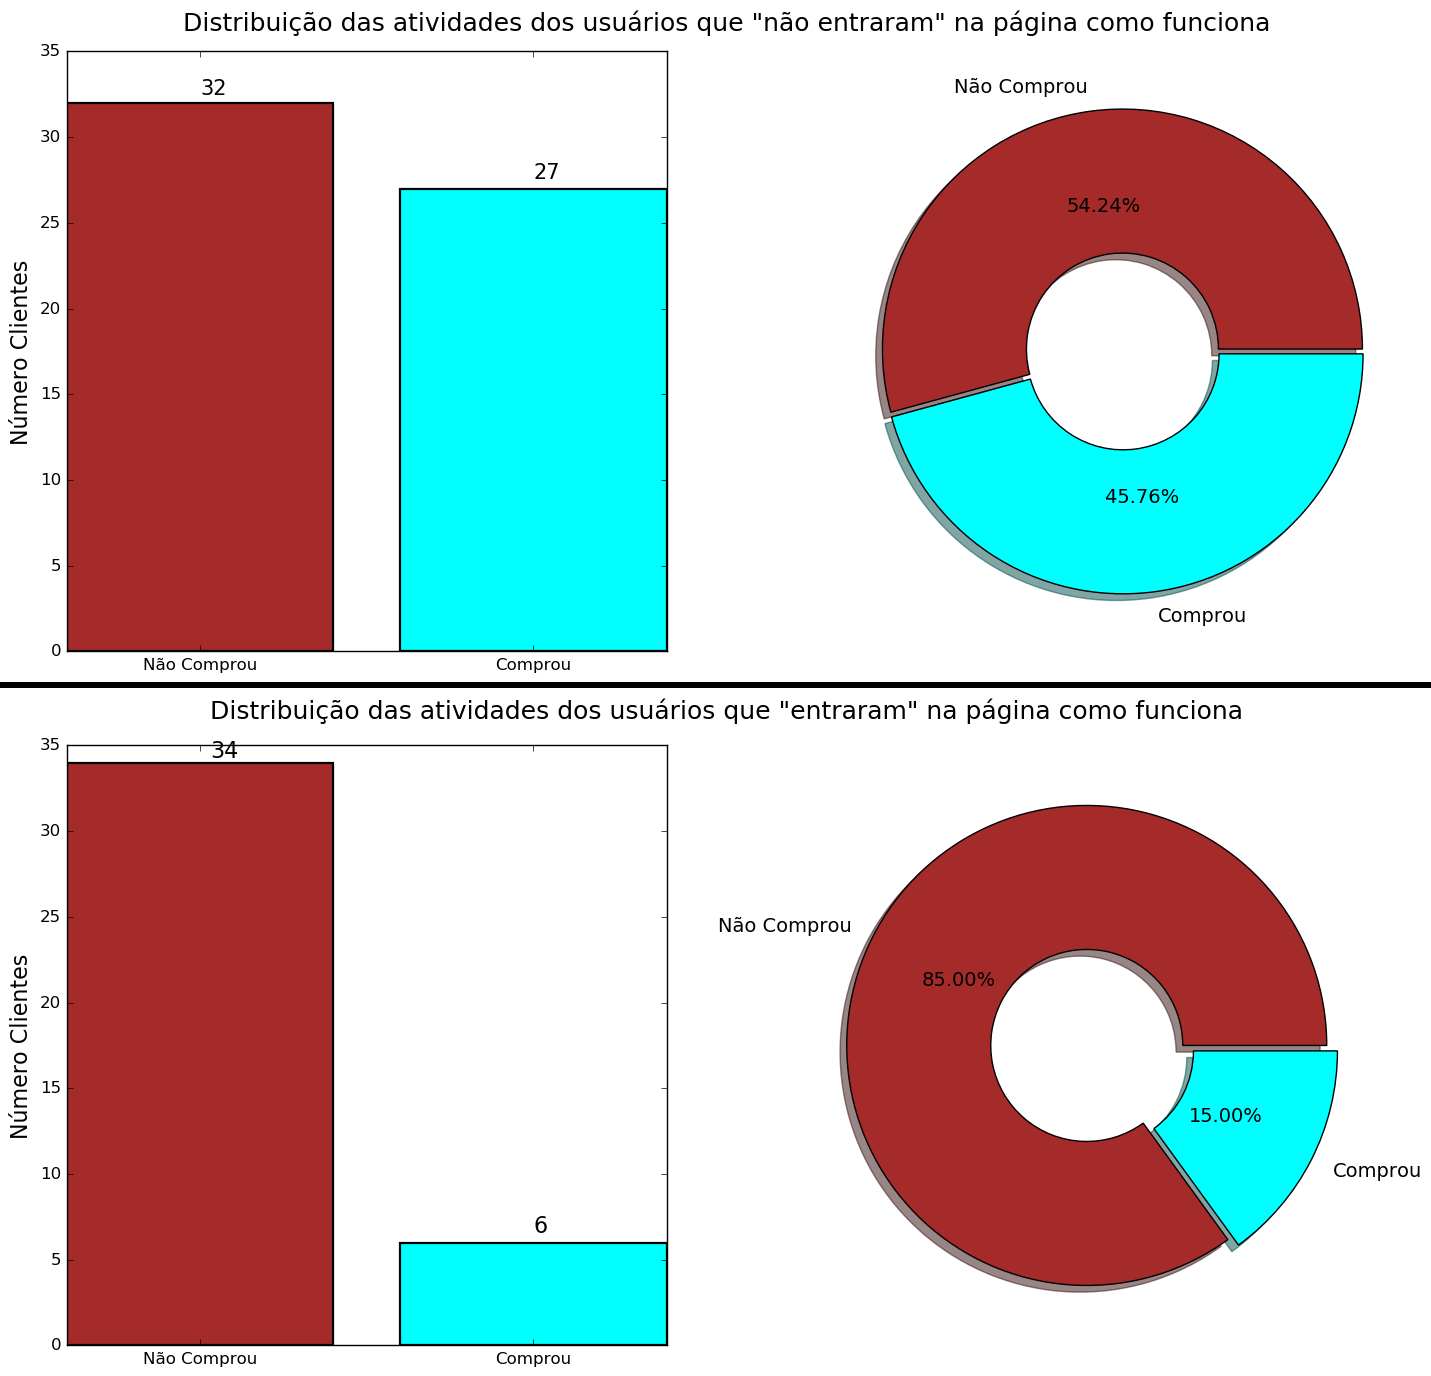

In [16]:
from PIL import Image

largura, altura = Image.open('entrou.png').size
combinada = Image.new("RGB", (largura, 2 * altura))
intervalo = 0
for imagem in map(Image.open, ['nao_entrou.png', 'entrou.png']):
    
    combinada.paste(imagem, (0, intervalo))
    intervalo += altura

combinada.save('combinada.png')
combinada

> Por algum motivo os usuários que entram na página <b>Como funciona</b> acabam não efetuando compras na plataforma <b>alura</b>. no primeiro gráfico onde o título chama-se "<b>Distribuição das atividades dos usuários que "não entraram" na página como funciona</b>", temos que de todos os usuário que não entraram na página como funciona apenas <font color = 'purple'>45.76%</font> fizem compras dentro da plataforma.

> Observando e análisando o segundo gráfico cujo o título chama-se "<b>Distribuição das atividades dos usuários que "entraram" na página como funciona</b>", temos que de todos os usuário que entraram na página como_funciona um percentual de apenas <font color = 'red'>15.00%</font> efetuou algum tipo de compra dentro da plataforma <b>Alura</b>.

> Podemos concluir então que a página <b>como_funciona</b> por algum motivo, faz com que os usuário resolvam não efetuar compras dentro da plataforma <b>Alura</b>. Análises mais precisas são necessárias para entender o real motivo que leva aos usuário não efetuarem compras dentro da platoma após entrerem na página <b>como funciona</b>.



### Contato

In [17]:
cores = ['brown', 'greenyellow']

In [18]:
dist_contato = pd.crosstab(index = dados['Contato'], columns = dados['Comprou'])
dist_contato.columns = ['Não comprou', 'Comprou']
dist_contato.rename(index = {0 : 'Não entrou em contato', 1 : 'Entrou em contato'}, inplace = True)
dist_contato.style.background_gradient(cmap="Reds", subset="Não comprou")\
                  .background_gradient(cmap="Blues", subset="Comprou")

,Não comprou,Comprou
Contato,,
Não entrou em contato,35,2
Entrou em contato,31,31


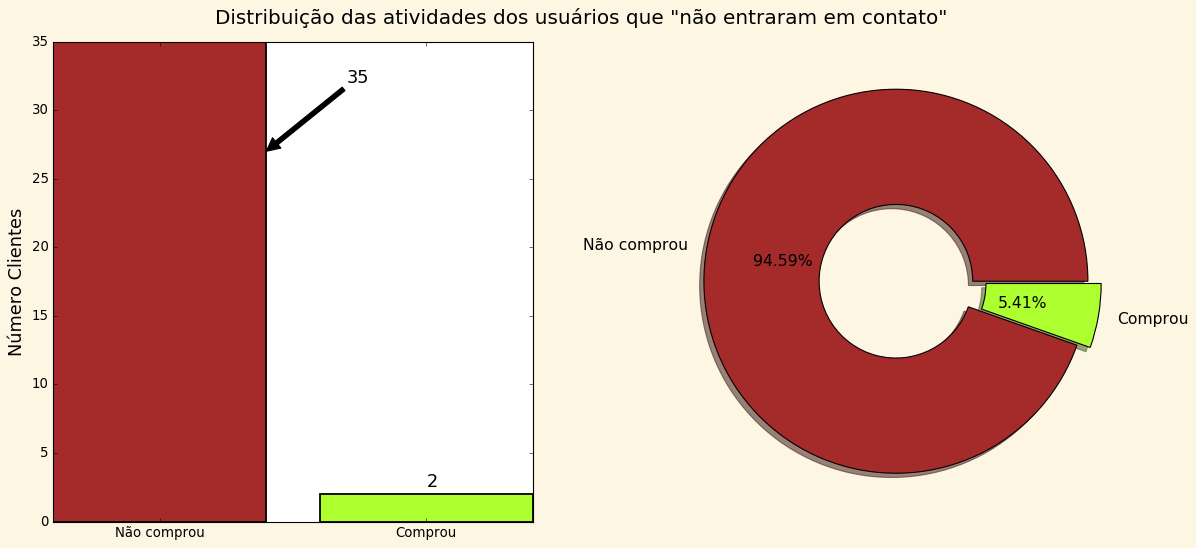

In [19]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (6, 6))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0.05, 1, 1])
eixo2 = fig.add_axes([1.26, 0.05, 1, 1])

eixo1.bar(dist_contato.loc['Não entrou em contato'].index, dist_contato.loc['Não entrou em contato'].values, color = cores, lw = 1.6, edgecolor = 'k')
eixo1.tick_params(labelsize=12, color = 'k')

# Legends
eixo1.annotate(f"{dist_contato.loc['Não entrou em contato'].values[0]}", xy = (0.4, 27), xytext=(0.7, 32), 
               arrowprops=dict(facecolor='k'), fontsize = 16)
eixo1.annotate(f"{dist_contato.loc['Não entrou em contato'].values[1]}", xy = (1, 2.5), fontsize = 16)
eixo1.set_ylabel('Número Clientes', fontsize = 16, color = 'k')

eixo2.pie(dist_contato.loc['Não entrou em contato'], colors = cores, explode=(0.01, 0.06), labels=dist_contato.loc['Não entrou em contato'].index,
         textprops={'size' : 14}, wedgeprops=dict(width=.6), autopct='%.2f%%', shadow = True)
plt.suptitle('Distribuição das atividades dos usuários que "não entraram em contato"', fontsize = 18, y=1.12, x = 1.1)
fig.savefig("contato1.png", bbox_inches='tight')

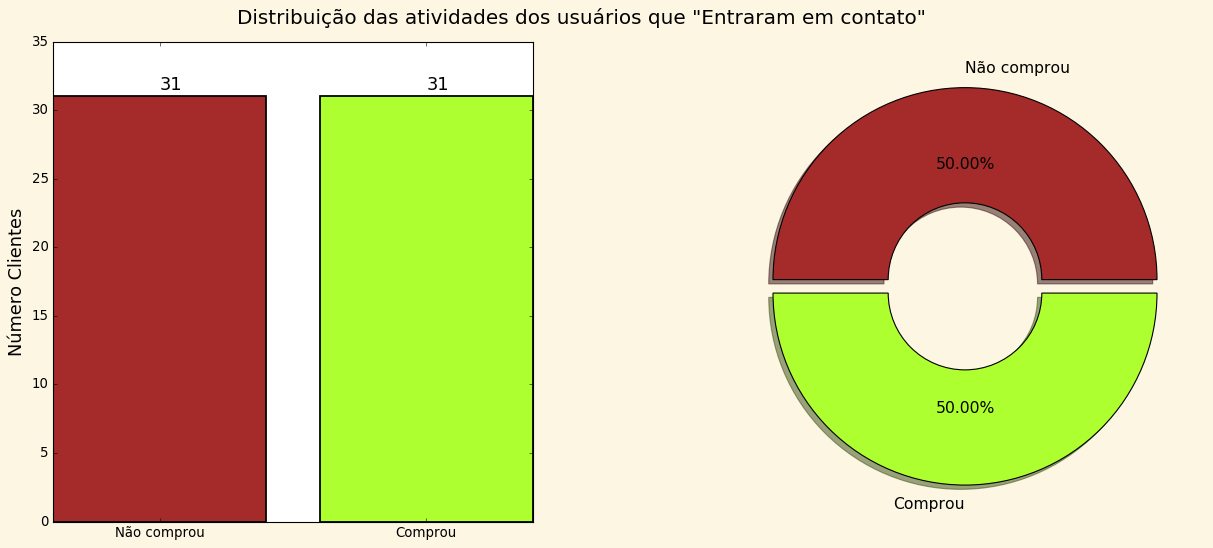

In [20]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (6, 6))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.4, 0, 1, 1])

eixo1.bar(dist_contato.loc['Entrou em contato'].index, dist_contato.loc['Entrou em contato'].values, color = cores, lw = 1.6, edgecolor = 'k')
eixo1.tick_params(labelsize=12, color = 'k')

# Legends
eixo1.annotate(f"{dist_contato.loc['Entrou em contato'].values[0]}", xy = (0, 31.5), fontsize = 16)
eixo1.annotate(f"{dist_contato.loc['Entrou em contato'].values[1]}", xy = (1, 31.5), fontsize = 16)
eixo1.set_ylabel('Número Clientes', fontsize = 16, color = 'k')

eixo2.pie(dist_contato.loc['Entrou em contato'], colors = cores, explode=(0.01, 0.06), labels=dist_contato.loc['Entrou em contato'].index,
         textprops={'size' : 14}, wedgeprops=dict(width=.6), autopct='%.2f%%', shadow = True)
plt.suptitle('Distribuição das atividades dos usuários que "Entraram em contato"', fontsize = 18, y=1.07, x = 1.1)
fig.savefig("contato2.png", bbox_inches="tight")

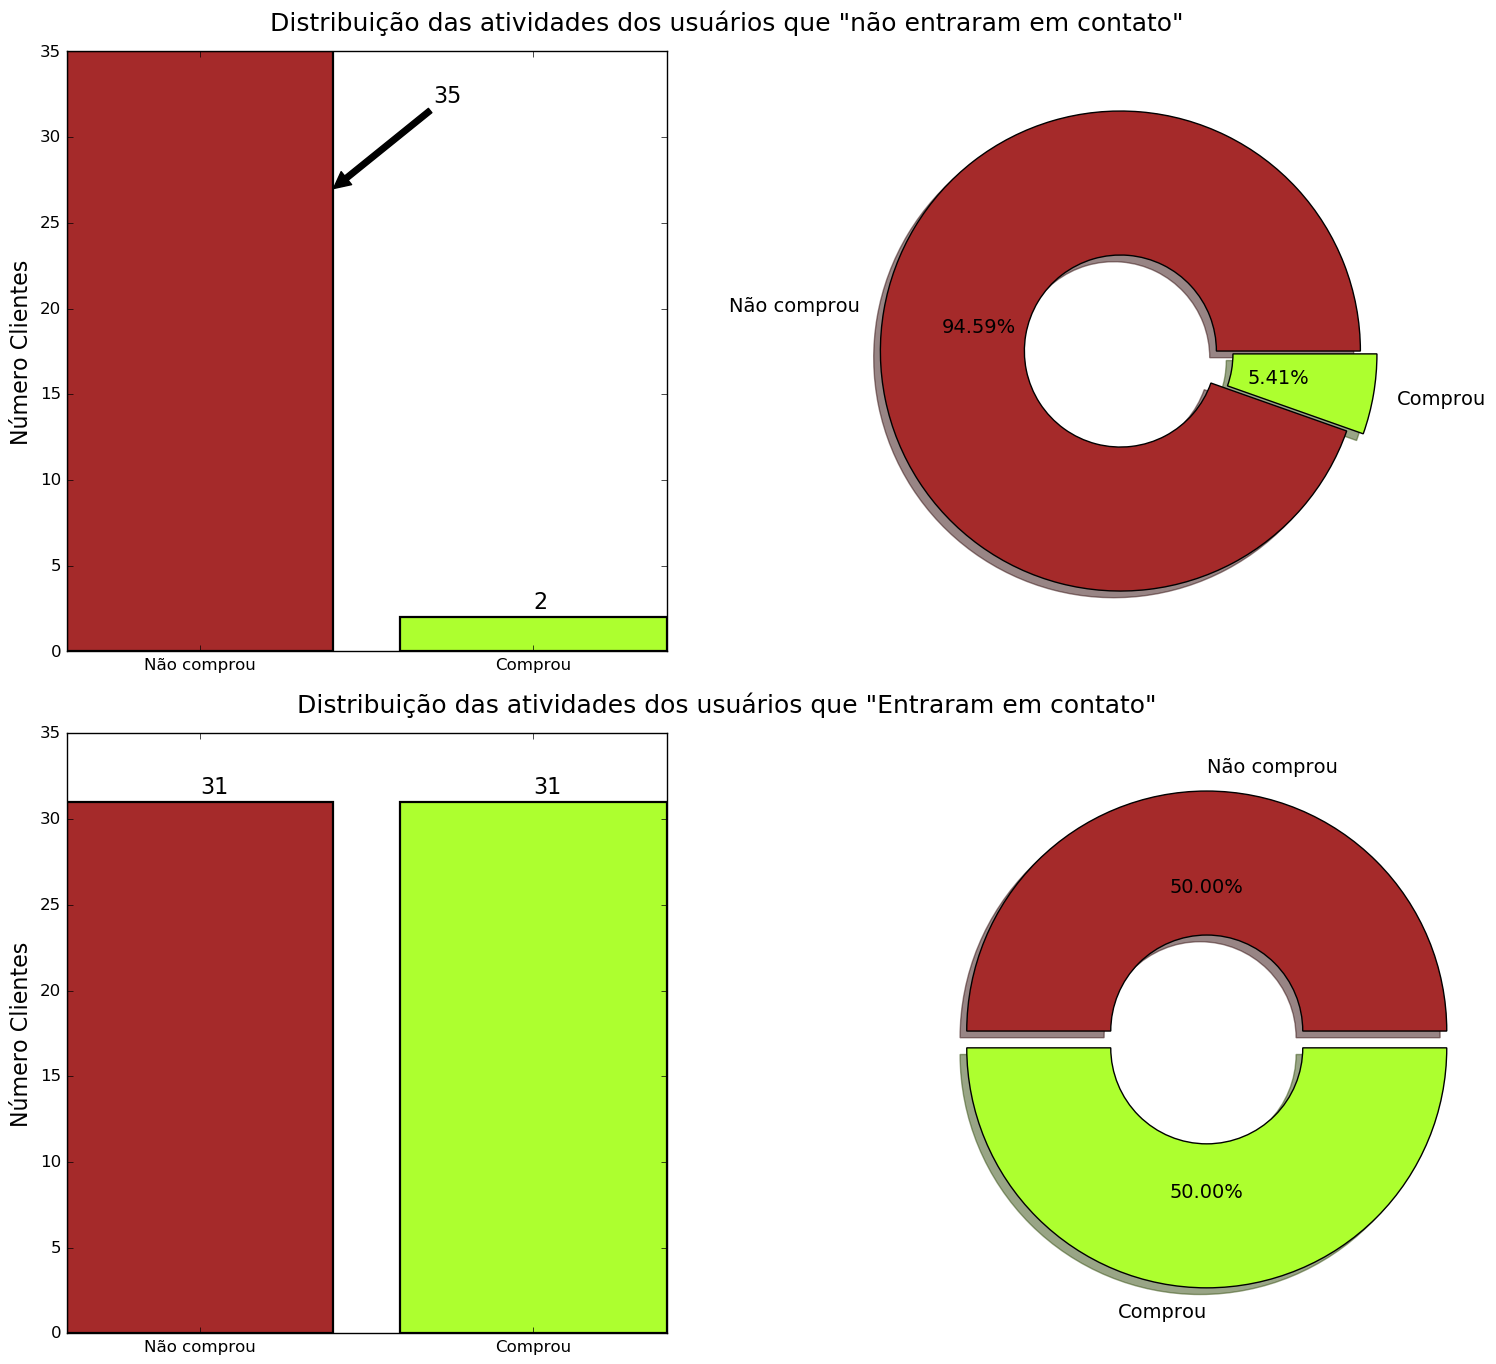

In [21]:
from PIL import Image

largura, altura = Image.open('contato1.png').size

combinada = Image.new("RGB", (largura, 2 * altura))
intervalo = 0
for imagem in map(Image.open, ['contato1.png', 'contato2.png']):
    
    combinada.paste(imagem, (0, intervalo))
    intervalo += altura

combinada.save('combinada.png')
combinada

> Visualizando os 2 gráficos acima, podemos concluir que o atributo contato é importantíssimo para a influência da compra de usuário dentro da plataforma. Em números estatísticos temos que, de todos os usuário que não entraram em contato com a <b>Alura</b> apenas <font color = 'red'>5.41%</font> efetuaram algum tipo de compra na plataforma.

> No segundo gráfico com o título "<b>Distribuição das atividades dos usuários que "Entraram em contato"</b>" um total de <font color = 'green'>50.00%</font> efetuaram compras na <b>Alura</b>. Ou seja os dados estão nos informando que o atributo contato é um bom sínal que usuários irão fazer compras, sabendo disso, podemos tomar certas medidas para melhorias no atendimento ao cliente, para máximizar o número de clientes que irão realizar comprasna plataforma.

## Civ. Análise aprofundada do comportamento dos clientes na plataforma 


<a id = "aprofundada"></a>

### Padrões dos clientes que realizam compras e os que não compram

In [22]:
freq_contato_como_funciona = pd.crosstab(index = dados["Como_funciona"], columns = dados['Contato'], values = dados['Comprou'], aggfunc=['count'])
freq_contato_como_funciona.columns = ['Não entrou em contato', 'Entrou em contato']
freq_contato_como_funciona.rename(index = {0 : 'Não entrou em como funciona', 1 : 'Entrou em como funciona'}, inplace = True)
freq_contato_como_funciona.style.background_gradient(cmap="Reds", subset=["Não entrou em contato"])\
                                .background_gradient(cmap="Greens", subset=["Entrou em contato"])

,Não entrou em contato,Entrou em contato
Como_funciona,,
Não entrou em como funciona,1,58
Entrou em como funciona,36,4


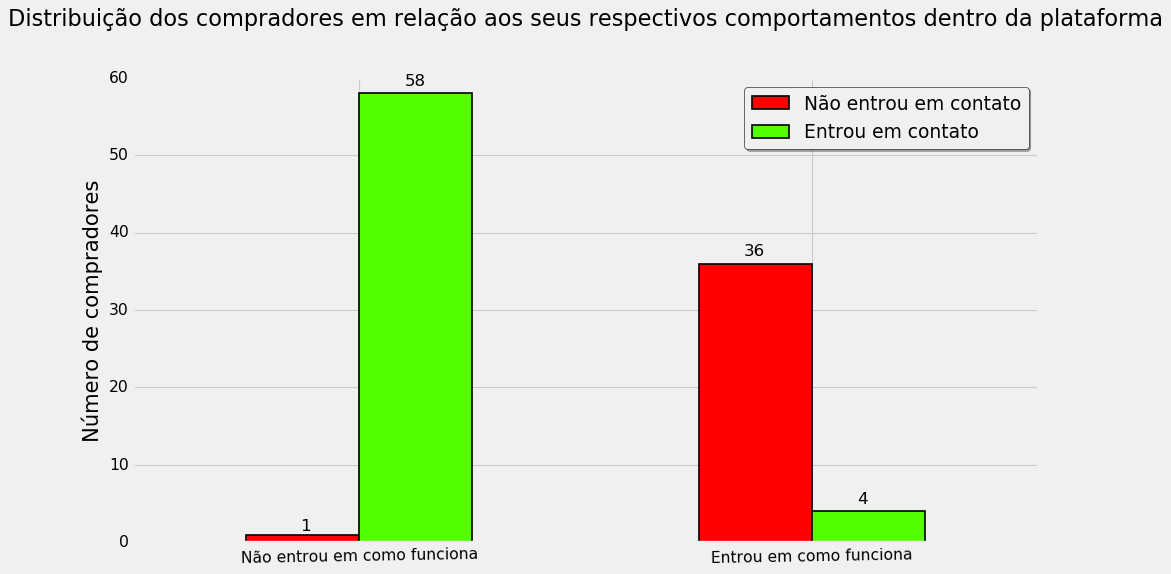

In [23]:
plt.style.use('fivethirtyeight')

# Gráfico
freq_contato_como_funciona.plot.bar(figsize = (13, 7), rot = 1, lw = 1.5, edgecolor = 'k', cmap = 'prism')

# Labels
plt.ylabel('Número de compradores', fontsize = 19, color = 'k')
plt.xlabel('')
plt.title('Distribuição dos compradores em relação aos seus respectivos comportamentos dentro da plataforma', y=1.1)
plt.tick_params(labelsize = 14)

# Anotações
plt.annotate(f"{freq_contato_como_funciona.loc['Não entrou em como funciona'].values[0]}", xy = (-.13, 1.5), fontsize = 15)
plt.annotate(f"{freq_contato_como_funciona.loc['Não entrou em como funciona'].values[1]}", xy = (0.1, 59), fontsize = 15)
plt.annotate(f"{freq_contato_como_funciona.loc['Entrou em como funciona'].values[0]}", xy = (.85, 37), fontsize = 15)
plt.annotate(f"{freq_contato_como_funciona.loc['Entrou em como funciona'].values[1]}", xy = (1.1, 5), fontsize = 15)

# Legenda
plt.legend(edgecolor= 'k', shadow = True);

> Como vimos anteriormente mas agora com análises mais precisas, a página <b>como_funciona</b> é o grande problema de o porque os usuário não realizam compras na plataforma <b>Alura</b>. As possibilidades do motivo pode ser várias, mas como sabemos o motivo da evazão de clientes dentro da plataforma, podemos atacar e otimizar o número de clientes que realizam compras dentro da plataforma <b>Alura</b>. Abaixo deixarei gráficos mais simples e fácil de entender como a página <b>como funciona</b> afeta as compras no site.

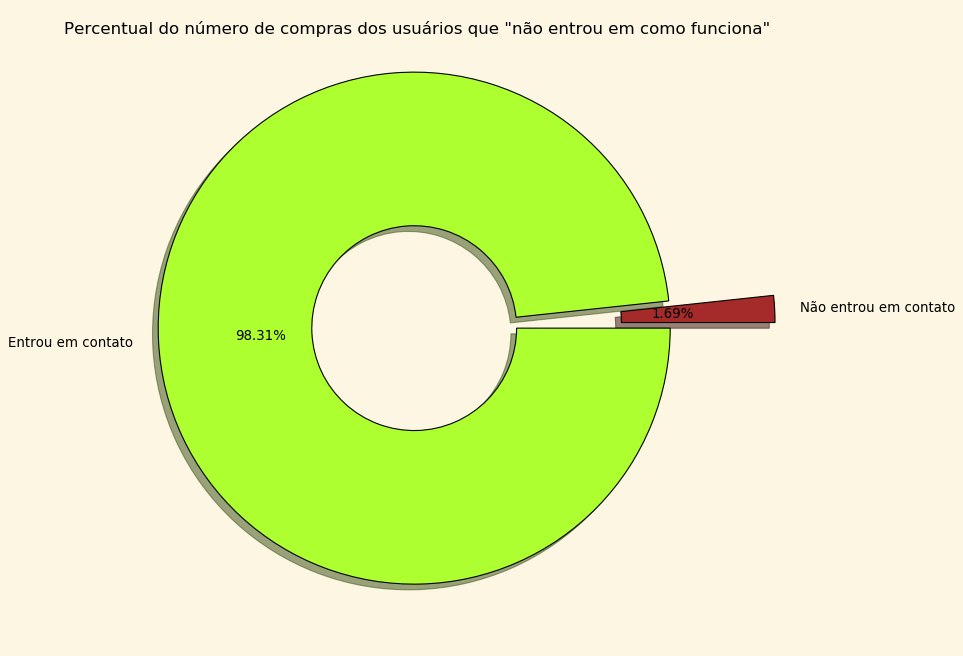

In [24]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (14, 8))
plt.style.use('classic')
eixo1 = fig.add_axes([0, 0, 1, 1])

eixo1.pie(freq_contato_como_funciona.loc['Não entrou em como funciona'], labels = freq_contato_como_funciona.loc['Não entrou em como funciona'].index,
         shadow = True, autopct='%.2f%%', wedgeprops=dict(width=.6), explode=(0.4, 0.01), colors = ['brown', 'greenyellow'])
eixo1.set_title('Percentual do número de compras dos usuários que "não entrou em como funciona"', fontsize = 15, y = .95)
fig.savefig("pie1.png", box_inches='tight')

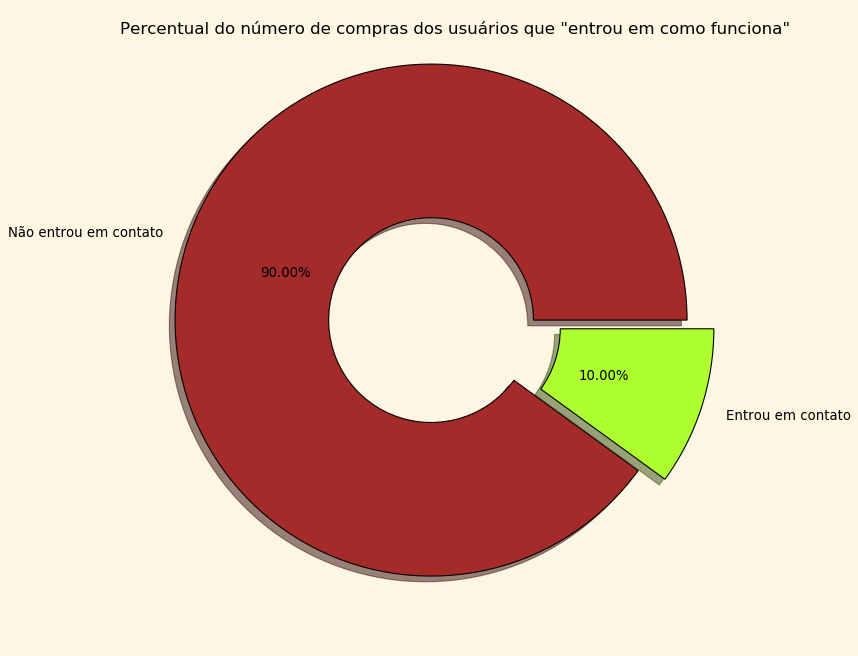

In [25]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (14, 8))
plt.style.use('classic')
eixo1 = fig.add_axes([0, 0, 1, 1])

eixo1.pie(freq_contato_como_funciona.loc['Entrou em como funciona'], labels = freq_contato_como_funciona.loc['Entrou em como funciona'].index,
         shadow = True, autopct='%.2f%%', wedgeprops=dict(width=.6), explode=(0.1, 0.01), colors = ['brown', 'greenyellow'])
eixo1.set_title('Percentual do número de compras dos usuários que "entrou em como funciona"', fontsize = 15, y = .95)
fig.savefig("pie2.png", box_inches='tight')

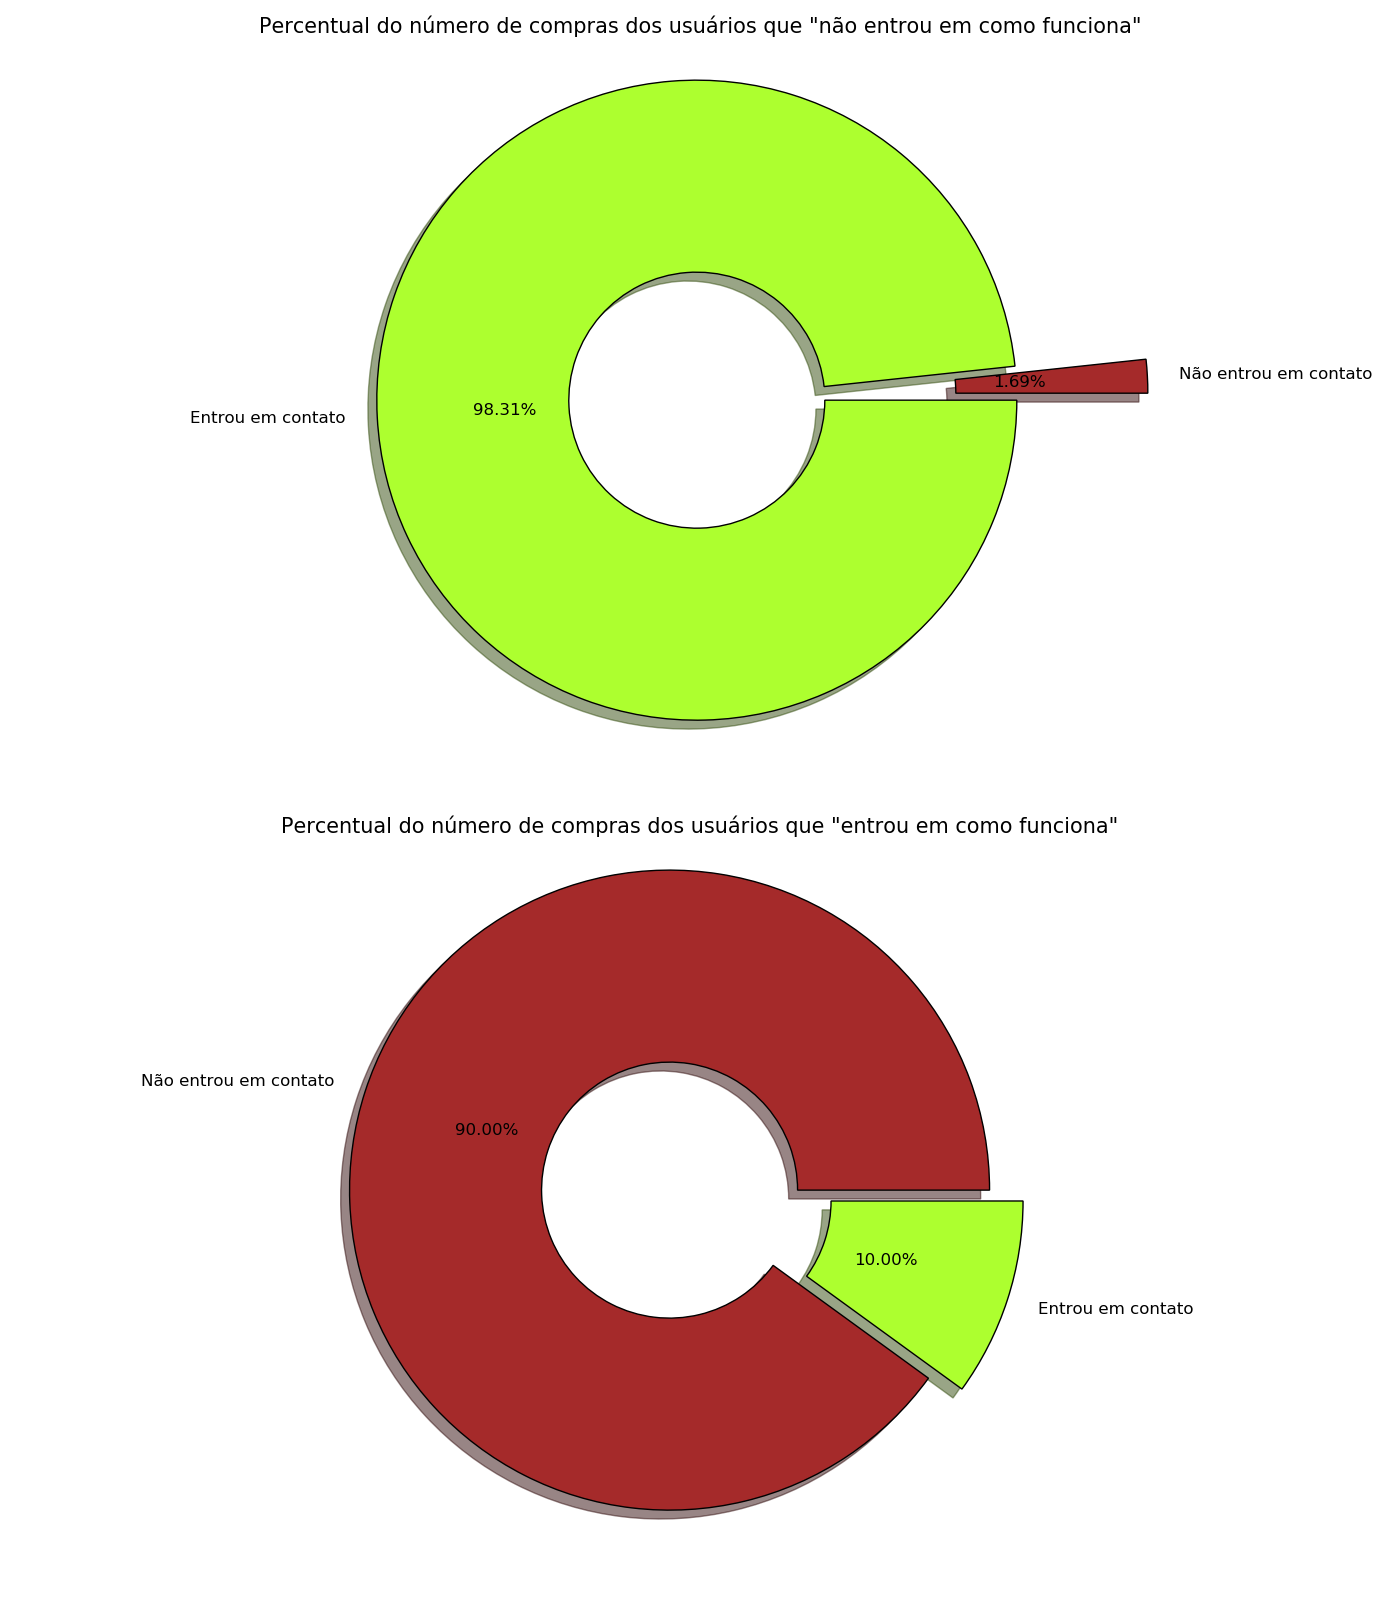

In [26]:
largura, altura = Image.open("pie1.png").size
combinada = Image.new("RGB", (largura, 2 * altura))
intervalo = 0

for imagem in map(Image.open, ['pie1.png', 'pie2.png']):
    
    combinada.paste(imagem, (0, intervalo))
    intervalo += altura

combinada.save('combinada.png')
combinada

# D. Processo de Modelagem com I.A - LinearSVC <br>

## Di. Instânciando e treinando o estimador 

<a id = "linearsvc">

**Separando os dados para treino e teste**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import LinearSVC

In [28]:
# Fixando seed
np.random.seed(2020)

# Separando todos os dados em variáveis genéricas x e y
x = dados[['Principal', 'Como_funciona', 'Contato']]
y = dados['Comprou']

# Utilizando o scikit-learning para separar em dados de treino e teste
train_x, test_x, train_y, test_y = tts(x, y, test_size=.2, stratify=y)

**Instânciando e treinando o LinearSVC**

In [29]:
# Instânciando
modelo = LinearSVC()

# Treinando o estimador
modelo.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Dii. Avaliação do LinearSVC

<a id ="avaliandosvc"></a>

In [30]:
# Gerando Relatório do classificador
def relatoriosvc():
    
    # Gerando as previsões do modelo
    previsoes = modelo.predict(test_x)
    
    # Imprimindo relatório
    print(f'Relatório-:\n{classification_report(test_y, previsoes)}')
    
    # Matriz de confusão
    plt.style.use('ggplot')
    sns.heatmap(confusion_matrix(test_y, previsoes), annot=True, lw=.15, cmap='twilight_shifted')

Relatório-:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



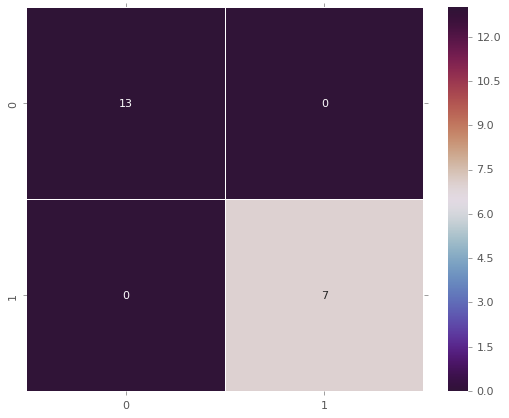

In [31]:
relatoriosvc()